In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [36]:
#Custom figures
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rc('font', size=14)

## 1. Import study data

In [37]:
ADNIMERGE = pd.read_csv("ADNIMERGE.csv",low_memory=False)
ADNIMERGE = ADNIMERGE[ADNIMERGE['VISCODE']=='bl']
#ADNIMERGE.head()

In [38]:
print("Number of rows: ", ADNIMERGE.shape[0])
print("Number of columns: ", ADNIMERGE.shape[1])

Number of rows:  2428
Number of columns:  116


## 2. Import genetic clusters

The `sample_id` is equivalent to the `PTID` column in the ADNIMERGE table. This ID will have a `RID` associated.

In [39]:
genetic_clusters_df = pd.read_csv("Genetic-Clusters/clusters_genetics_DEM.csv")
genetic_clusters_df.head()

,PTID,cluster
0,007_S_0101,0
1,005_S_4707,0
2,130_S_2373,1
3,003_S_4152,0
4,094_S_4282,1


In [40]:
print("Total number of subjects: ", genetic_clusters_df.shape[0])

Total number of subjects:  216


We are going to create two new columns with the `RID` and the diagnosis in baseline (`DX_bl`). SMC subjects are going to be included in the CN group, whereas both EMCI and LMCI are going to form an unique group (MCI). 

In [41]:
genetic_clusters_df = pd.merge(ADNIMERGE[['PTID', 'RID', 'DX_bl']], genetic_clusters_df, how='inner', 
                               left_on = 'PTID', right_on = 'PTID')
genetic_clusters_df['DX_bl'] = genetic_clusters_df['DX_bl'].replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})
genetic_clusters_df.head()

,PTID,RID,DX_bl,cluster
0,023_S_0042,42,MCI,0
1,099_S_0051,51,MCI,0
2,023_S_0061,61,CN,0
3,007_S_0101,101,MCI,0
4,123_S_0106,106,CN,0


In addition, we are going to count how many subjects are there for each genetic cluster.

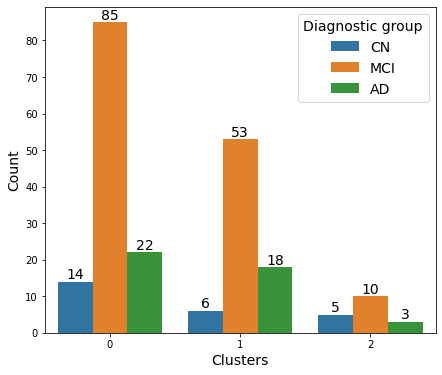

In [42]:
#Calculate the number of subjects for each group
genetic_clusters_count = genetic_clusters_df.groupby(['cluster','DX_bl']).agg(Count=("RID", 'count'))
genetic_clusters_count = genetic_clusters_count.reset_index()

#Plot barplot
fig = plt.figure(figsize=(7,6))

ax = sns.barplot(x = "cluster",
            y = "Count",
            hue = "DX_bl",
            data = genetic_clusters_count,
            hue_order=["CN","MCI","AD"])

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel("Clusters")
plt.ylabel("Count")
plt.legend(title="Diagnostic group")

plt.show()

## 3. Import neurocognitive test batteries

In [43]:
cluster_variables = ['cluster']

### 3.1. ADAS-cog

In [44]:
#ADAS-cog (ADNIGO,2,3)
ADAS = pd.read_csv("Neuropsychological/ADAS_ADNIGO23.csv")
ADAS = ADAS[ADAS['VISCODE2']=='bl']
ADAS.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,WORDLIST,Q1UNABLE,Q1TR1,Q1TR2,Q1TR3,Q1TRIT,Q1TR2T,Q1TRT,Q1SCORE,TIMEEND,Q2UNABLE,Q2TASK,Q2SCORE,Q3UNABLE,Q3TASK1,Q3TASK2,Q3TASK3,Q3TASK4,Q3SCORE,Q4UNABLE,TIMEBEGAN,Q4TASK,Q4SCORE,Q5UNABLE,Q5TASK,Q5SCORE,Q5NAME1,Q5NAME2,Q5NAME3,Q5NAME4,Q5NAME5,Q5NAME6,Q5NAME7,Q5NAME8,Q5NAME9,Q5NAME10,Q5NAME11,Q5NAME12,Q5FINGER,Q5SCORE_CUE,Q6UNABLE,Q6TASK,Q6SCORE,Q7UNABLE,Q7TASK,Q7SCORE,Q8UNABLE,Q8WORD1,Q8WORD1R,Q8WORD2,Q8WORD2R,Q8WORD3,Q8WORD3R,Q8WORD4,Q8WORD4R,Q8WORD5,Q8WORD5R,Q8WORD6,Q8WORD6R,Q8WORD7,Q8WORD7R,Q8WORD8,Q8WORD8R,Q8WORD9,Q8WORD9R,Q8WORD10,Q8WORD10R,Q8WORD11,Q8WORD11R,Q8WORD12,Q8WORD12R,Q8WORD13,Q8WORD13R,Q8WORD14,Q8WORD14R,Q8WORD15,Q8WORD15R,Q8WORD16,Q8WORD16R,Q8WORD17,Q8WORD17R,Q8WORD18,Q8WORD18R,Q8WORD19,Q8WORD19R,Q8WORD20,Q8WORD20R,Q8WORD21,Q8WORD21R,Q8WORD22,Q8WORD22R,Q8WORD23,Q8WORD23R,Q8WORD24,Q8WORD24R,Q8SCORE,Q9TASK,Q9SCORE,Q10TASK,Q10SCORE,Q11TASK,Q11SCORE,Q12TASK,Q12SCORE,COMM,TOTSCORE,Q13UNABLE,Q13TASKA,Q13TASKB,Q13TASKC,Q13SCORE,TOTAL13,DATE,SOURCE,update_stamp
5,ADNIGO,22,2002,48,bl,bl,2010-07-06,2011-02-28,1.0,NaN,0:1:2:3:5:6:7,0:1:2:3:4:5:6:7:8:9,0:2:3:4:5:6:7:8:9,NaN,NaN,NaN,1.0,NaN,NaN,1:2:3:4:5,0.0,NaN,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0:1:3:4:6:7:8:9,2.0,NaN,1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:2:3:4:5,0.0,NaN,1:2:3:4:5:6:7:8,0.0,NaN,0.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,31.0,0.0,0.0,0.0,4.0,NaN,NaN,2012-11-16 09:32:21.0
6,ADNIGO,24,2007,12,bl,bl,2010-07-07,2011-02-28,1.0,NaN,1:4:7:8:9,0:3:4:6:7:8:9,0:2:3:4:5:6:7:8:9,NaN,NaN,NaN,3.0,NaN,NaN,1:2:3:4:5,0.0,NaN,1.0,1.0,1.0,2.0,1.0,NaN,NaN,0:1:2:4:5:6:7:8,2.0,NaN,1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:2:3:4:5,0.0,NaN,1:2:3:4:5:6:7:8,0.0,NaN,0.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,NaN,23.0,0.0,0.0,0.0,9.0,NaN,NaN,2012-11-16 09:32:21.0
7,ADNIGO,26,2010,1,bl,bl,2010-07-09,2011-02-28,1.0,NaN,0:1:4:6:7:8:9,0:2:3:4:5:6:7:8:9,0:1:2:3:5:6:8:9,NaN,NaN,NaN,2.0,NaN,NaN,1:2:3:4:5,0.0,NaN,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0:1:2:4:5:7:9,3.0,NaN,1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:2:3:4:5,0.0,NaN,1:2:3:4:5:6:7:8,0.0,NaN,0.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,NaN,30.0,0.0,0.0,0.0,6.0,NaN,NaN,2012-11-16 09:32:21.0
10,ADNIGO,32,2011,48,bl,bl,2010-07-21,2011-02-28,1.0,NaN,0:1:2:3:6:7:9,0:1:2:3:4:5:9,0:1:2:3:4:5:8:9,NaN,NaN,NaN,3.0,NaN,NaN,1:2:3:4:5,0.0,NaN,1.0,1.0,1.0,2.0,1.0,NaN,NaN,0:1:2:3:4:5:7:9,2.0,NaN,1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:2:3:4:5,0.0,NaN,1:2:3:4:5:6:7:8,0.0,NaN,0.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,NaN,18.0,0.0,0.0,1.0,7.0,NaN,NaN,2012-11-16 09:32:21.0
13,ADNIGO,38,2003,48,bl,bl,2010-07-23,2011-02-28,1.0,NaN,0:3:6:9,0:1:2:4:5:6:9,0:1:2:4:5:6:8:9,NaN,NaN,NaN,4.0,NaN,NaN,1:2:3:4:5,0.0,NaN,1.0,1.0,1.0,2.0,1.0,NaN,NaN,0:2:3:4:6:7:8:9,2.0,NaN,1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:2:3:4:5,0.0,NaN,1:2:3:4:5:6:7:8,0.

Count missing data

In [45]:
ADAS_columns = ["Q1SCORE","Q2SCORE","Q3SCORE","Q4SCORE","Q5SCORE","Q6SCORE","Q7SCORE",
          "Q8SCORE","Q9SCORE","Q10SCORE","Q11SCORE","Q12SCORE","Q13SCORE"]
    
print("Number of rows with missing values: ", ADAS[ADAS_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(ADAS_columns) )

Number of rows with missing values:  13
Total number of tests:  13


There are only 13 subjects that have missing data in any test. 

In [46]:
#Drop NaN
ADAS = ADAS.dropna(subset=ADAS_columns)
print("Number of subjects that have completed all tests: ", ADAS.shape[0])

Number of subjects that have completed all tests:  1593


### 3.3. MoCA

In [47]:
#MoCA (ADNIGO,2,3)
MOCA = pd.read_csv("Neuropsychological/MOCA.csv")
MOCA = MOCA[MOCA['VISCODE2']=='bl']
MOCA.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,TRAILS,CUBE,CLOCKCON,CLOCKNO,CLOCKHAN,LION,RHINO,CAMEL,IMMT1W1,IMMT1W2,IMMT1W3,IMMT1W4,IMMT1W5,IMMT2W1,IMMT2W2,IMMT2W3,IMMT2W4,IMMT2W5,DIGFOR,DIGBACK,LETTERS,SERIAL1,SERIAL2,SERIAL3,SERIAL4,SERIAL5,REPEAT1,REPEAT2,FFLUENCY,ABSTRAN,ABSMEAS,DELW1,DELW2,DELW3,DELW4,DELW5,DATE,MONTH,YEAR,DAY,PLACE,CITY,MOCA,MCDATE,SOURCE,update_stamp
5,ADNIGO,14,2002,48,bl,bl,2010-07-06,2010-08-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2012-11-16 09:41:13.0
6,ADNIGO,16,2007,12,bl,bl,2010-07-07,2011-01-11,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2012-11-16 09:41:13.0
7,ADNIGO,18,2010,1,bl,bl,2010-07-09,2010-07-23,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2012-11-16 09:41:13.0
10,ADNIGO,24,2011,48,bl,bl,2010-07-21,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.0,1.0,1.0,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2012-11-16 09:41:13.0
13,ADNIGO,30,2003,48,bl,bl,2010-07-23,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,14.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2012-11-16 09:41:13.0


In [48]:
print("Number of subjects: ", len(MOCA['RID'].unique()))

Number of subjects:  1606


In [49]:
#Count missing data
MOCA_columns = MOCA.columns[8:-4].tolist()

#for column in MOCA_columns:
#    NullSum = MOCA[column].isnull().sum(axis = 0)
#    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", MOCA[MOCA_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(MOCA_columns) )

Number of rows with missing values:  51
Total number of tests:  42


In [50]:
#Drop NaN
MOCA = MOCA.dropna(subset=MOCA_columns)
print("Number of subjects that have completed all tests: ", MOCA.shape[0])

Number of subjects that have completed all tests:  1555


There are 51 subjects that have missing data. 

If we do not discard the rows that have missing values, the total number of patients in the merged table would be 1605. All of them will be patients with information for the 3 batteries -although not necessarily all test completed-.

### 3.5. Merged batteries (ADAS and MoCA)

Merge the ADAS-cog and MoCA assessments.

In [51]:
ADASMOCA = pd.merge(ADAS,MOCA,on='RID')
ADASMOCA.head()

,Phase_x,ID_x,RID,SITEID_x,VISCODE_x,VISCODE2_x,USERDATE_x,USERDATE2_x,WORDLIST,Q1UNABLE,Q1TR1,Q1TR2,Q1TR3,Q1TRIT,Q1TR2T,Q1TRT,Q1SCORE,TIMEEND,Q2UNABLE,Q2TASK,Q2SCORE,Q3UNABLE,Q3TASK1,Q3TASK2,Q3TASK3,Q3TASK4,Q3SCORE,Q4UNABLE,TIMEBEGAN,Q4TASK,Q4SCORE,Q5UNABLE,Q5TASK,Q5SCORE,Q5NAME1,Q5NAME2,Q5NAME3,Q5NAME4,Q5NAME5,Q5NAME6,Q5NAME7,Q5NAME8,Q5NAME9,Q5NAME10,Q5NAME11,Q5NAME12,Q5FINGER,Q5SCORE_CUE,Q6UNABLE,Q6TASK,Q6SCORE,Q7UNABLE,Q7TASK,Q7SCORE,Q8UNABLE,Q8WORD1,Q8WORD1R,Q8WORD2,Q8WORD2R,Q8WORD3,Q8WORD3R,Q8WORD4,Q8WORD4R,Q8WORD5,Q8WORD5R,Q8WORD6,Q8WORD6R,Q8WORD7,Q8WORD7R,Q8WORD8,Q8WORD8R,Q8WORD9,Q8WORD9R,Q8WORD10,Q8WORD10R,Q8WORD11,Q8WORD11R,Q8WORD12,Q8WORD12R,Q8WORD13,Q8WORD13R,Q8WORD14,Q8WORD14R,Q8WORD15,Q8WORD15R,Q8WORD16,Q8WORD16R,Q8WORD17,Q8WORD17R,Q8WORD18,Q8WORD18R,Q8WORD19,Q8WORD19R,Q8WORD20,Q8WORD20R,Q8WORD21,Q8WORD21R,Q8WORD22,Q8WORD22R,Q8WORD23,Q8WORD23R,Q8WORD24,Q8WORD24R,Q8SCORE,Q9TASK,Q9SCORE,Q10TASK,Q10SCORE,Q11TASK,Q11SCORE,Q12TASK,Q12SCORE,COMM,TOTSCORE,Q13UNABLE,Q13TASKA,Q13TASKB,Q13TASKC,Q13SCORE,TOTAL13,DATE_x,SOURCE_x,update_stamp_x,Phase_y,ID_y,SITEID_y,VISCODE_y,VISCODE2_y,USERDATE_y,USERDATE2_y,TRAILS,CUBE,CLOCKCON,CLOCKNO,CLOCKHAN,LION,RHINO,CAMEL,IMMT1W1,IMMT1W2,IMMT1W3,IMMT1W4,IMMT1W5,IMMT2W1,IMMT2W2,IMMT2W3,IMMT2W4,IMMT2W5,DIGFOR,DIGBACK,LETTERS,SERIAL1,SERIAL2,SERIAL3,SERIAL4,SERIAL5,REPEAT1,REPEAT2,FFLUENCY,ABSTRAN,ABSMEAS,DELW1,DELW2,DELW3,DELW4,DELW5,DATE_y,MONTH,YEAR,DAY,PLACE,CITY,MOCA,MCDATE,SOURCE_y,update_stamp_y
0,ADNIGO,22,2002,48,bl,bl,2010-07-06,2011-02-28,1.0,NaN,0:1:2:3:5:6:7,0:1:2:3:4:5:6:7:8:9,0:2:3:4:5:6:7:8:9,NaN,NaN,NaN,1.0,NaN,NaN,1:2:3:4:5,0.0,NaN,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0:1:3:4:6:7:8:9,2.0,NaN,1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:2:3:4:5,0.0,NaN,1:2:3:4:5:6:7:8,0.0,NaN,0.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,31.0,0.0,0.0,0.0,4.0,NaN,NaN,2012-11-16 09:32:21.0,ADNIGO,14,48,bl,bl,2010-07-06,2010-08-31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2012-11-16 09:41:13.0
1,ADNIGO,24,2007,12,bl,bl,2010-07-07,2011-02-28,1.0,NaN,1:4:7:8:9,0:3:4:6:7:8:9,0:2:3:4:5:6:7:8:9,NaN,NaN,NaN,3.0,NaN,NaN,1:2:3:4:5,0.0,NaN,1.0,1.0,1.0,2.0,1.0,NaN,NaN,0:1:2:4:5:6:7:8,2.0,NaN,1:2:3:4:5:6:7:8:9:10:11:13:14:15:16:17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:2:3:4:5,0.0,NaN,1:2:3:4:5:6:7:8,0.0,NaN,0.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,7.0,NaN,23.0,0.0,0.0,0.0,9.0,NaN,NaN,2012-11-16 09:32:21.0,ADNIGO,16,12,bl,bl,2010-07-07,2011-01-11,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20.0,0.0,1.0,0.0,2.0,0.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,2012-11-16 09:41:13.0
2,ADNIGO,26,2010,1,bl,bl,2010-07-09,2011-02-28,1.0,NaN,0:1:4:6:7:8:9,0:2:3:4:5:6:7:8:9,0:1:2:3:5:6:8:9,NaN,NaN,NaN,2.0,NaN,NaN,1:2:3:4:5,0.0,NaN,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0:1:2:4:5:7:9,3.0,NaN,1:2:3:4:5:6:7:8:9:10:11:12:13:14:15:16:17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:2:3:4:5,0.0,NaN,1:2:3:4:5:6:7:8,0.0,NaN,0.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,-4.0,1.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,0.0,-4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,NaN,30.0,0.0,0.0,0.0,6.0,NaN,NaN,2012-11-16 09:32:21.0,ADNIGO,18,1,bl,bl,2010-07-09,2010-07-23,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.

In [52]:
print("Number of subjects with data for all batteries: ", ADASMOCA.shape[0])

Number of subjects with data for all batteries:  1544


If we do not discard the rows that have missing values, the total number of patients in the merged table would be 1605. All of them will be patients with information for the 3 batteries -although not necessarily all test completed-.

### 3.6. NEUROBAT

In [53]:
#NEUROBAT (ADNI1,GO,2,3)
NEUROBAT = pd.read_csv("Neuropsychological/NEUROBAT.csv",low_memory=False)
NEUROBAT = NEUROBAT[NEUROBAT['VISCODE2']=='bl']
NEUROBAT.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,CLOCKCIRC,CLOCKSYM,CLOCKNUM,CLOCKHAND,CLOCKTIME,CLOCKSCOR,COPYCIRC,COPYSYM,COPYNUM,COPYHAND,COPYTIME,COPYSCOR,LMSTORY,LIMMTOTAL,LIMMEND,AVTOT1,AVERR1,AVTOT2,AVERR2,AVTOT3,AVERR3,AVTOT4,AVERR4,AVTOT5,AVERR5,AVTOT6,AVERR6,AVTOTB,AVERRB,AVENDED,DSPANFOR,DSPANFLTH,DSPANBAC,DSPANBLTH,CATANIMSC,CATANPERS,CATANINTR,CATVEGESC,CATVGPERS,CATVGINTR,TRAASCOR,TRAAERRCOM,TRAAERROM,TRABSCOR,TRABERRCOM,TRABERROM,DIGITSCOR,LDELBEGIN,LDELTOTAL,LDELCUE,BNTND,BNTSPONT,BNTSTIM,BNTCSTIM,BNTPHON,BNTCPHON,BNTTOTAL,AVDELBEGAN,AVDEL30MIN,AVDELERR1,AVDELTOT,AVDELERR2,ANARTND,ANARTERR,MINTSEMCUE,MINTTOTAL,MINTUNCUED,RAVLT_forgetting,RAVLT_immediate,RAVLT_learning,RAVLT_perc_forgetting,DATE,SOURCE,update_stamp
9,ADNI1,30,2,107,bl,bl,2005-09-09,NaN,2005-09-08,1.0,0.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,NaN,7.0,0.0,7.0,0.0,9.0,0.0,10.0,0.0,11.0,0.0,5.0,2.0,4.0,1.0,NaN,10.0,8.0,8.0,5.0,15.0,2.0,0.0,8.0,0.0,0.0,29.0,0.0,0.0,112.0,1.0,0.0,34.0,NaN,NaN,NaN,-4.0,29.0,0.0,0.0,0.0,0.0,29.0,NaN,5.0,4.0,6.0,0.0,-4.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26 16:22:44.0
10,ADNI1,32,5,107,bl,bl,2005-09-09,NaN,2005-09-07,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,NaN,5.0,1.0,6.0,1.0,9.0,0.0,8.0,0.0,9.0,0.0,4.0,0.0,4.0,1.0,NaN,10.0,8.0,8.0,6.0,19.0,1.0,0.0,11.0,0.0,0.0,50.0,0.0,0.0,90.0,1.0,0.0,38.0,NaN,NaN,NaN,-4.0,27.0,0.0,0.0,3.0,30.0,27.0,NaN,5.0,5.0,15.0,1.0,-4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26 16:22:44.0
12,ADNI1,36,3,107,bl,bl,2005-09-13,NaN,2005-09-12,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,4.0,NaN,NaN,NaN,3.0,0.0,6.0,0.0,4.0,0.0,5.0,0.0,4.0,0.0,3.0,1.0,1.0,2.0,NaN,10.0,7.0,5.0,4.0,10.0,0.0,0.0,5.0,1.0,1.0,57.0,0.0,0.0,148.0,1.0,0.0,25.0,NaN,NaN,NaN,-4.0,17.0,0.0,0.0,13.0,5.0,17.0,NaN,0.0,0.0,1.0,0.0,-4.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26 16:22:44.0
20,ADNI1,52,8,107,bl,bl,2005-09-26,NaN,2005-09-19,1.0,0.0,0.0,1.0,1.0,3.0,1.0,0.0,1.0,1.0,1.0,4.0,NaN,NaN,NaN,5.0,1.0,10.0,2.0,12.0,0.0,12.0,0.0,12.0,0.0,10.0,0.0,5.0,0.0,NaN,7.0,6.0,4.0,3.0,22.0,1.0,0.0,16.0,0.0,0.0,31.0,0.0,0.0,51.0,0.0,0.0,49.0,NaN,NaN,NaN,-4.0,27.0,0.0,0.0,3.0,30.0,27.0,NaN,9.0,1.0,13.0,0.0,-4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26 16:22:44.0
33,ADNI1,78,7,10,bl,bl,2005-10-13,NaN,2005-10-06,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,NaN,2.0,1.0,3.0,1.0,3.0,1.0,5.0,1.0,4.0,0.0,1.0,0.0,1.0,0.0,NaN,7.0,6.0,3.0,3.0,8.0,0.0,0.0,3.0,0.0,3.0,82.0,0.0,0.0,300.0,2.0,0.0,9.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-08-26 16:22:44.0


Count missing data

In [54]:
#Count missing data
NEUROBAT_columns = ["AVTOT1","AVTOT2","AVTOT3","AVTOT4","AVTOT5","CATANIMSC",
          "CATANPERS","CATANINTR","BNTSPONT","BNTCSTIM","BNTCPHON",
               "CLOCKSCOR","COPYSCOR","TRAASCOR",
               "TRABSCOR","ANARTERR", "AVDEL30MIN","AVDELTOT"]

for column in NEUROBAT_columns:
    NullSum = NEUROBAT[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")

print("Number of rows with missing values: ", NEUROBAT[NEUROBAT_columns].isna().any(axis=1).sum())

print("Total number of tests: ", len(NEUROBAT_columns) )

AVTOT1: 3
AVTOT2: 3
AVTOT3: 3
AVTOT4: 3
AVTOT5: 4
CATANIMSC: 3
CATANPERS: 3
CATANINTR: 3
BNTSPONT: 694
BNTCSTIM: 696
BNTCPHON: 696
CLOCKSCOR: 5
COPYSCOR: 7
TRAASCOR: 9
TRABSCOR: 44
ANARTERR: 54
AVDEL30MIN: 4
AVDELTOT: 8
Number of rows with missing values:  743
Total number of tests:  18


There are only 13 subjects that have missing data in any test. 

In [55]:
#Drop NaN
NEUROBAT = NEUROBAT.dropna(subset=NEUROBAT_columns)
print("Number of subjects that have completed all tests: ", NEUROBAT.shape[0])

Number of subjects that have completed all tests:  1683


## 4. DATA PREPROCESSING

We are going to use the controls' data to normalize the test results. To this end, we are going to compute z-scores. 

In [56]:
def group_by_test(metadata, df):
    """Function to group the scores measuring the same functions"""

    test_ls = metadata['Label'].unique()
    
    #Iterate each test
    for test in test_ls:
        variable_ls = metadata[metadata['Label']==test]['ADNI column'].tolist()
        df[test] = df[variable_ls].sum(axis=1)
        
    return df

#### Plot z-scores by cognitive domain

1. Compute averages of each test
2. Group by NC domain
3. Compute the average of each domain

In [57]:
def zscores_means(X, dx, metadata_path):
    """Function to generate a table with the means by cognitive domain and diagnostic group"""
    #Compute the test means
    means_df = X.mean(axis=0).to_frame()
    means_df.columns = ["Mean"]
    means_df['Label'] = means_df.index

    #Import the test-cognitive domain relations    
    metadata = pd.read_csv(metadata_path, sep=";", 
                            usecols = ['Label', 'Cognitive Domain'])

    means_df = means_df.join(metadata.set_index('Label'))[['Cognitive Domain', 'Mean']]

    #Compute NC domain means
    means_df = means_df.groupby(['Cognitive Domain'])['Mean'].mean().to_frame()
    means_df.reset_index(inplace=True)

    #Add diagnostic group
    means_df["Diagnostic"] = dx
    
    return(means_df)

In [58]:
from sklearn.preprocessing import StandardScaler

### 4.1. ADAS-Cog

In [59]:
#group variables by cognitive test
metadata_path = "./NC_Tests/ADAS_Metadata.csv"
ADAS_metadata = pd.read_csv(metadata_path, sep=";")
ADAS = group_by_test(ADAS_metadata, ADAS)

#### 4.1.1. Control data

In [60]:
#get test results for the controls
ADAS_CN = ADAS[ADAS.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", ADAS_CN.shape[0])
#filter table to show only tests results
ADAS_columns = ADAS_metadata['Label'].unique()
ADAS_CN = ADAS_CN[ADAS_columns]
ADAS_CN.head()

Number of controls:  312


,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC
484,2.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
489,4.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
494,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
507,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
508,5.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0


#### 4.1.2. Fit the scaler with the controls data

In [61]:
scaler = StandardScaler()
scaler.fit(ADAS_CN)

StandardScaler()

#### 4.1.3. Transform data

In [62]:
ADAS_DX = pd.merge(genetic_clusters_df, ADAS, on='RID')

metadata = list(["cluster"])
metadata.append("RID")
metadata_ADAS = pd.DataFrame(ADAS_DX[metadata]) #IDs
X_ADAS = ADAS_DX[ADAS_columns] #tests scores

#scale data
X_ADAS = scaler.transform(X_ADAS)

#Convert into pandas dataframe
X_ADAS = pd.DataFrame(X_ADAS,columns=ADAS_columns)
display(X_ADAS.head())
print("Number of subjects: ", X_ADAS.shape[0])

,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC
0,0.888373,-0.188959,-0.721320,1.260507,-0.240056,-0.251894,5.843785,0.042501,-0.107608,-0.113961,-0.190164,-0.120972,0.894685
1,1.654677,-0.188959,1.093615,2.345413,-0.240056,-0.251894,2.774322,1.103322,-0.107608,-0.113961,-0.190164,-0.120972,2.356159
2,0.888373,-0.188959,1.093615,0.175602,-0.240056,-0.251894,-0.295141,-0.487910,-0.107608,-0.113961,-0.190164,-0.120972,-0.566790
3,0.888373,-0.188959,-0.721320,1.260507,-0.240056,-0.251894,-0.295141,0.042501,-0.107608,-0.113961,-0.190164,-0.120972,-0.566790
4,2.420981,2.618436,-0.721320,2.345413,-0.240056,-0.251894,-0.295141,2.164143,-0.107608,-0.113961,-0.190164,-0.120972,-0.566790


Number of subjects:  109


### 4.3. MOCA

In [63]:
#group variables by cognitive test
metadata_path = "./NC_Tests/MOCA_Metadata.csv"
MOCA_metadata = pd.read_csv(metadata_path, sep=";")
MOCA = group_by_test(MOCA_metadata, MOCA)

In [64]:
#get test results for the controls
MOCA_CN = MOCA[MOCA.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MOCA_CN.shape[0])
#filter table to show only tests results
MOCA_columns = MOCA_metadata['Label'].unique()
MOCA_CN = MOCA_CN[MOCA_columns]
MOCA_CN.head()

Number of controls:  307


,Mo1_TMT,Mo2_CC,Mo3_CDT,Mo4_NT,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SelA,Mo10_SST,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
484,1.0,0.0,2.0,2.0,4.0,5.0,1.0,1.0,0.0,2.0,2.0,17.0,1.0,5.0,4.0,2.0
489,1.0,1.0,3.0,3.0,5.0,5.0,1.0,0.0,0.0,5.0,2.0,15.0,2.0,14.0,4.0,2.0
494,1.0,1.0,3.0,3.0,5.0,5.0,1.0,1.0,0.0,5.0,2.0,22.0,2.0,11.0,4.0,2.0
507,1.0,1.0,3.0,3.0,5.0,5.0,1.0,1.0,0.0,5.0,1.0,20.0,2.0,5.0,4.0,2.0
508,1.0,1.0,3.0,3.0,4.0,4.0,0.0,1.0,0.0,5.0,2.0,13.0,2.0,15.0,4.0,2.0


#### 4.3.1. Fit the scaler with the controls data

In [65]:
scaler = StandardScaler()

scaler.fit(MOCA_CN)

StandardScaler()

#### 4.3.2. Transform data

In [66]:
MOCA_DX = pd.merge(genetic_clusters_df, MOCA, on='RID')

metadata = list(["cluster"])
metadata.append("RID")
metadata_MOCA = pd.DataFrame(MOCA_DX[metadata]) #IDs
X_MOCA = MOCA_DX[MOCA_columns] #tests scores

#scale data
X_MOCA = scaler.transform(X_MOCA)

#Convert into pandas dataframe
X_MOCA = pd.DataFrame(X_MOCA,columns=MOCA_columns)
display(X_MOCA.head())
print("Number of subjects: ", X_MOCA.shape[0])

,Mo1_TMT,Mo2_CC,Mo3_CDT,Mo4_NT,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SelA,Mo10_SST,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
0,-3.433900,0.644008,0.510033,0.316794,0.496042,0.232577,0.201688,0.263982,-0.367743,-1.860604,0.503467,-0.567098,0.372687,-2.798278,0.21859,0.114897
1,0.291214,0.644008,0.510033,0.316794,0.496042,0.232577,0.201688,0.263982,-0.367743,0.470847,0.503467,1.734692,0.372687,0.959690,0.21859,0.114897
2,-3.433900,0.644008,0.510033,0.316794,0.496042,0.232577,0.201688,0.263982,3.160293,-1.860604,-1.478127,0.060663,0.372687,0.959690,0.21859,0.114897
3,0.291214,-1.552775,0.510033,0.316794,0.496042,0.232577,0.201688,0.263982,1.396275,0.470847,0.503467,1.316185,-4.496037,-0.919294,0.21859,0.114897
4,0.291214,0.644008,-1.497404,0.316794,-1.274712,0.232577,0.201688,0.263982,-0.367743,0.470847,0.503467,0.897678,-4.496037,-0.167701,0.21859,0.114897


Number of subjects:  107


### 4.5. Merged data (ADAS and MoCA)

In [67]:
#group variables by cognitive test
metadata_path = "./NC_Tests/ADASMOCA_Metadata.csv"
ADASMOCA_metadata = pd.read_csv(metadata_path, sep=";")
ADASMOCA = group_by_test(ADASMOCA_metadata, ADASMOCA)

In [68]:
#get test results for the controls
ADASMOCA_CN = ADASMOCA[ADASMOCA.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", ADASMOCA_CN.shape[0])
#filter table to show only tests results
ADASMOCA_columns = ADASMOCA_metadata['Label'].unique()
ADASMOCA_CN = ADASMOCA_CN[ADASMOCA_columns]
ADASMOCA_CN.head()

Number of controls:  307


,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC,Mo1_TMK,Mo2_CC,Mo3_Drawing,Mo4_Naming,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SA,Mo10_Serial,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
127,2.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,4.0,5.0,1.0,1.0,0.0,2.0,2.0,17.0,1.0,5.0,4.0,2.0
129,4.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,1.0,0.0,0.0,5.0,2.0,15.0,2.0,14.0,4.0,2.0
131,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,5.0,5.0,1.0,1.0,0.0,5.0,2.0,22.0,2.0,11.0,4.0,2.0
137,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,1.0,1.0,0.0,5.0,1.0,20.0,2.0,5.0,4.0,2.0
138,5.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,0.0,1.0,0.0,5.0,2.0,13.0,2.0,15.0,4.0,2.0


#### 4.4.1. Fit the scaler with the controls data

In [69]:
scaler = StandardScaler()

scaler.fit(ADASMOCA_CN)

StandardScaler()

#### 4.4.2. Transform data

In [70]:
ADASMOCA_DX = pd.merge(genetic_clusters_df, ADASMOCA, on='RID')

metadata = list(['cluster'])
metadata.append("RID")
metadata_ADASMOCA = pd.DataFrame(ADASMOCA_DX[metadata]) #IDs
X_ADASMOCA = ADASMOCA_DX[ADASMOCA_columns] #tests scores

#scale data
X_ADASMOCA = scaler.transform(X_ADASMOCA)

#Convert into pandas dataframe
X_ADASMOCA = pd.DataFrame(X_ADASMOCA,columns=ADASMOCA_columns)
display(X_ADASMOCA.head())
print("Number of subjects: ", X_ADASMOCA.shape[0])

,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC,Mo1_TMK,Mo2_CC,Mo3_Drawing,Mo4_Naming,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SA,Mo10_Serial,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
0,0.893662,-0.183494,-0.725137,1.280226,-0.242117,-0.254068,5.796116,0.046576,-0.108491,-0.114897,-0.182935,-0.121967,0.891446,-3.433900,0.644008,0.510033,0.316794,0.496042,0.232577,0.201688,0.263982,-0.367743,-1.860604,0.503467,-0.567098,0.372687,-2.798278,0.21859,0.114897
1,0.893662,-0.183494,1.084758,0.191502,-0.242117,-0.254068,-0.297746,-0.483010,-0.108491,-0.114897,-0.182935,-0.121967,-0.564266,0.291214,0.644008,0.510033,0.316794,0.496042,0.232577,0.201688,0.263982,-0.367743,0.470847,0.503467,1.734692,0.372687,0.959690,0.21859,0.114897
2,0.893662,-0.183494,-0.725137,1.280226,-0.242117,-0.254068,-0.297746,0.046576,-0.108491,-0.114897,-0.182935,-0.121967,-0.564266,-3.433900,0.644008,0.510033,0.316794,0.496042,0.232577,0.201688,0.263982,3.160293,-1.860604,-1.478127,0.060663,0.372687,0.959690,0.21859,0.114897
3,2.427652,2.633138,-0.725137,2.368951,-0.242117,-0.254068,-0.297746,2.164920,-0.108491,-0.114897,-0.182935,-0.121967,-0.564266,0.291214,-1.552775,0.510033,0.316794,0.496042,0.232577,0.201688,0.263982,1.396275,0.470847,0.503467,1.316185,-4.496037,-0.919294,0.21859,0.114897
4,2.427652,-0.183494,1.084758,1.280226,4.130233,-0.254068,-0.297746,-0.483010,-0.108491,-0.114897,4.137154,-0.121967,0.891446,0.291214,0.644008,-1.497404,0.316794,-1.274712,0.232577,0.201688,0.263982,-0.367743,0.470847,0.503467,0.897678,-4.496037,-0.167701,0.21859,0.114897


Number of subjects:  107


### 4.6. NEUROBAT

In [71]:
#group variables by cognitive test
metadata_path = "./NC_Tests/NEUROBAT_Metadata.csv"
NEUROBAT_metadata = pd.read_csv(metadata_path, sep=";")
NEUROBAT = group_by_test(NEUROBAT_metadata, NEUROBAT)

#### 4.1.1. Control data

In [72]:
#get test results for the controls
NEUROBAT_CN = NEUROBAT[NEUROBAT.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", NEUROBAT_CN.shape[0])
#filter table to show only tests results
NEUROBAT_columns = NEUROBAT_metadata['Label'].unique()
NEUROBAT_CN = NEUROBAT_CN[NEUROBAT_columns]
NEUROBAT_CN.head()

Number of controls:  413


,NB1_RAVLTD,NB2_RAVLTR,NB3_RAVLTI,NB4_CAT_FLU,NB5_BNT,NB6_CDT,NB7_CCT,NB8_DSF,NB9_DSB,NB10_TMTA,NB11_TMTB,NB12_ANART
9,5.0,6.0,44.0,23.0,29.0,4.0,5.0,10.0,8.0,29.0,112.0,16.0
10,5.0,15.0,37.0,30.0,27.0,5.0,5.0,10.0,8.0,50.0,90.0,5.0
20,9.0,13.0,51.0,38.0,27.0,3.0,4.0,7.0,4.0,31.0,51.0,8.0
35,6.0,14.0,40.0,29.0,27.0,5.0,4.0,7.0,5.0,29.0,79.0,25.0
40,9.0,13.0,50.0,34.0,29.0,5.0,5.0,8.0,7.0,27.0,49.0,7.0


#### 4.1.2. Fit the scaler with the controls data

In [73]:
scaler = StandardScaler()
scaler.fit(NEUROBAT_CN)

StandardScaler()

#### 4.1.3. Transform data

In [74]:
NEUROBAT_DX = pd.merge(genetic_clusters_df, NEUROBAT, on='RID')

metadata = list(["cluster"])
metadata.append("RID")
metadata_NEUROBAT = pd.DataFrame(NEUROBAT_DX[metadata]) #IDs
X_NEUROBAT = NEUROBAT_DX[NEUROBAT_columns] #tests scores

#scale data
X_NEUROBAT = scaler.transform(X_NEUROBAT)

#Convert into pandas dataframe
X_NEUROBAT = pd.DataFrame(X_NEUROBAT,columns=NEUROBAT_columns)
display(X_NEUROBAT.head())
print("Number of subjects: ", X_NEUROBAT.shape[0])

,NB1_RAVLTD,NB2_RAVLTR,NB3_RAVLTI,NB4_CAT_FLU,NB5_BNT,NB6_CDT,NB7_CCT,NB8_DSF,NB9_DSB,NB10_TMTA,NB11_TMTB,NB12_ANART
0,-1.676659,-1.918969,-1.483468,-0.180662,0.830534,0.524248,0.291505,1.548335,0.508936,0.412019,0.355900,-0.405363
1,-1.158156,-1.121651,-1.483468,-1.119853,-0.534682,0.524248,0.291505,0.463029,0.763403,-0.664443,0.194046,3.088050
2,-0.380403,0.074326,-0.994972,-0.285017,-1.558594,0.524248,0.291505,1.114213,1.017871,3.475793,0.032192,1.878791
3,-1.417408,-1.918969,-1.971965,0.028047,0.830534,-2.591070,0.291505,0.897152,0.763403,-1.326880,-0.823323,1.610067
4,0.138100,0.074326,-0.213377,1.071592,0.830534,0.524248,0.291505,0.897152,0.763403,-0.830052,-0.384005,-0.942812


Number of subjects:  206


## 5. ADJACENCY MATRIX

Simple correlation (a.k.a. Pearson correlation coefficient) may not give a complete picture while trying to understand the relationship between two variables (A and B) especially when there exist other influencing variables that affect A (and/or) B.
In fact, simple correlation mainly focuses on finding the influence of each variable on the other.

Whereas **partial correlation** is used to find the refined relationship between two variables with the effect of the other influencing variables being excluded/controlled.

#### Import required packages

In [75]:
#!pip install pingouin

In [76]:
from pingouin import partial_corr

#### Create partial correlation function

In [77]:
def par_corr(data_df):
    """
    Compute partial pairwise correlation of columns. 
    When a pair of columns are picked, then all other columns are treated as control variables. 
    
    @param data_df DataFrame
    @return DataFrame, whose data is a symmetric matrix
    """ 
    
    n = data_df.shape[1] #total number of tests
    mat = np.empty((n, n)) #empty matrix to store results 
    np.fill_diagonal(mat, 1) #diagonal elements have correlation equal to 1.0
    count_neg = 0 #count negative correlations
    
    for i in range(n):
        for j in range(i + 1, n):
            #get columns names
            x = data_df.columns[i]
            y = data_df.columns[j]
            xy_colnames = [data_df.columns[index] for index in [i,j]]
            covar = [ var for var in data_df.columns if var not in xy_colnames]
            
            #partial correlation
            corr_df = partial_corr(data=data_df, x=x, y=y, covar=covar, method='spearman') #partial correlation stats
            p_value = corr_df.iloc[0]['p-val']
            corr = corr_df.iloc[0]['r'] #get partial correlation value
            #if p_value < 0.05:
            #    corr = corr_df.iloc[0]['r'] #get partial correlation value
            #else:
            #    corr = 0

            #store results
            mat[i, j] = corr
            mat[j, i] = corr
            
    return pd.DataFrame(mat, index=data_df.columns, columns=data_df.columns)

In [78]:
def plot_adjacency_mx(mx, variable, cluster, battery_name):
    fig = plt.figure(figsize=(10,8))
    
    sns.heatmap(data=mx, annot=False, cmap="Spectral_r", vmin=-1, vmax=1)

    #add title
    plt.title('Adjacency matrixes ' + variable + '-cluster ' + str(cluster) + ' (' + battery_name + ')')
    
    filename = "./Genetic-Clusters/Results_weights/" + battery_name + "/" + variable + "/Figures/matrix_cluster" + str(cluster) + ".svg"
    
    plt.savefig(filename, format="svg")
    plt.close(fig) #do not show figure 
    #plt.show()

## 5.1. Bootstrap

As some clusters have very few patients -12 subjects-, we are going to try to estimate the population parameters by performing a bootstrap (resampling with repositioning). Each group is going to have 12 patients selected randomly. 

In [79]:
def bootstrap(X, n_size, n_rep):
    """Function to generate an array of random adjacency matrices obtained trough randomly selecting patients from 
    each cluster (resampling with repositioning)
    Parameters:
      - X: df with the normalizad results for each test and patient
      - n_size: size of the new samples
      - n_rep: number of samples
    Output:
      - Array with all the adjacencies matrices obtained from the new samples"""
    #Parameter of the adjacency matrix
    n_rows = X.shape[1]
    n_cols = X.shape[1]
    labels = X.columns 
    
    #Create array to store results
    adj_matrices = np.zeros((n_rep, n_rows, n_cols))
    
    #Convert dataframe into numpy array
    #to gain computational efficiency
    #arr = X.to_numpy()
    
    print("Running bootstrap...")
    for i in range(n_rep):
        sample = X.sample(n = n_size, replace = True)
        #sample = pd.Dataframe(sample_arr, columns=labels, index=labels)
        #generate adjacency matrix
        mx = par_corr(sample)
        adj_matrices[i] = mx.to_numpy()
    
    return adj_matrices

In [80]:
def adj_matrix(matrices,labels):
    """Generate a matrix with the mean values for each pair"""
    
    #Create an array to store the element-wise sum of the matrices
    sum_mx = np.zeros(matrices[0].shape)
    
    # Loop over each matrix and add it to the sum matrix
    for mx in matrices:
        sum_mx += mx
    
    # Divide the sum matrix by the number of matrices to get the mean
    mean_mx = sum_mx / len(matrices)
    
    adj_mx = pd.DataFrame(mean_mx, columns=labels, index=labels)
    
    return adj_mx

In [81]:
def adj_matrix(matrices,labels):
    """Generate a matrix with the mean values for each pair"""
    
    #Create an array to store the element-wise sum of the matrices
    sum_mx = np.zeros(matrices[0].shape)
    
    #Initializate auxiliary variables
    sum_values = np.zeros(matrices[0].shape)
    n_values = np.zeros(matrices[0].shape)
    
    # Loop over each matrix and add it to the sum matrix
    for mx in matrices:
        # Iterate the matrix
        for i in range(mx.shape[0]):
            for j in range(mx.shape[1]):
                # if the value is not null, add it:
                if not np.isnan(mx[i,j]):
                    sum_values[i,j] += mx[i,j]
                    n_values[i,j] += 1

    
    # Get the mean
    mean_mx = np.divide(sum_values, n_values)
    
    adj_mx = pd.DataFrame(mean_mx, columns=labels, index=labels)
    
    return adj_mx

## 6. GRAPH CONSTRUCTION

In [82]:
import networkx as nx

In [83]:
def cognitive_network(mx):
    """Function to remove diagonal elements and convert scores into absolute values. It returns a networkx graph"""

    for i in range(mx.shape[1]): #iterate matrix elements
        colname = mx.columns[i]
        #Remove diagonal elements
        mx[colname] =np.where((mx[colname]==1.0) | (mx[colname].isnull()),0, mx[colname]) 
        #Convert negative correlations in positive ones
        mx[colname] = np.where((mx[colname]<0),-1*mx[colname], mx[colname]) 
    
    #Create graph from adjacency matrix
    g = nx.from_numpy_array(mx.to_numpy())
    
    return g

In [84]:
def node_attributes(metadata_path, graph, X): 
    """Function to add attributes to the nodes of the graph"""
    
    attribute_ls = ['Node', 'Label', 'Test', 'Cognitive Domain']
    
    #Import node metadata
    metadata_df = pd.read_csv(metadata_path, sep=";", 
                                usecols = attribute_ls)
    metadata_df = metadata_df[attribute_ls].drop_duplicates()
    
    #Add attributes
    for attribute in attribute_ls:
        nx.set_node_attributes(graph, dict(zip(metadata_df.Node, metadata_df[attribute])), name=attribute)
        
    #add mean z-score to each node 
    means = X.mean(axis=0).tolist()
    nx.set_node_attributes(graph, dict(zip(metadata_df.Node, means)), name='Zscore mean')

In [85]:
import matplotlib.lines as mlines

def draw_graph(graph, test_labels, pos, mapping, battery_name, variable, cluster):
    
    #Color by NC domain
    ATTRIBUTE_NAME = 'Cognitive Domain'
    mapping = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4, 'Visuospatial':5}
    colorCodes_dict = {0:"#9999FF", 1:"#CC99FF", 2:"#F8766D", 3:"#00BFC4", 4:"#66CC99", 5:"#FFCC99"}
    
    colors=[]
    for node in list(graph.nodes()): #iterate each node
        domain = graph.nodes[node][ATTRIBUTE_NAME]
        color = mapping[domain]
        colors.append(colorCodes_dict[color])
    
    #get edges weights
    weights = list(nx.get_edge_attributes(graph,'weight').values())

    #Plot
    fig = plt.figure(figsize=(10,8))

    if test_labels is not None: 
        nx.draw(G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors,
               edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
    else:
        nx.draw(G=graph, pos=pos, with_labels=True, node_color=colors, 
               edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    
    #Add legend labels
    edge_labels = {tuple(edge): float(weight) for edge, weight in nx.get_edge_attributes(graph,'weight').items()}

    handles=[]
    labels=[]
    # add labels and handles to combined legend
    for edge, weight in edge_labels.items():
        if edge not in labels:
            handles.append(mlines.Line2D([], [], color='grey', linewidth=10*weight, label=weight))
            labels.append(edge)

    # create colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Greys, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
    #sm._A = []
    plt.colorbar(sm)
    
    plt.title('Cognitive network ' + variable + '-cluster ' + str(cluster) + ' (' + battery_name + ')')
    figure_path = "./Genetic-Clusters/Results_weights/" + battery_name + "/" + variable +"/Figures/graph_cluster-" + str(cluster) +".svg"

    plt.savefig(figure_path, format="svg")
    plt.close(fig)
    #plt.show()

## 7. NETWORK ANALYSIS

### 7. 1. CENTRALITY MEASURES

#### Degree Centrality

In network analysis, measures of the importance of nodes are referred to as **centrality** measures. **Degree** is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges between all the possible connections. This is the centrality measure used in the epilepsy paper. 

#### Other centrality measures

- **Closeness centrality**: is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. 
- **Eigenvector centrality**: is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. 
- **Betweenness centrality**: t doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network.

In [86]:
def centrality(cm_df,graph,cluster, metric, index):
    
    """Function to compute a table with the different centrality measures for each node."""
    
    #compute edges distances based on weights
    g_distance_dict = {(e1, e2): 1/weight for e1, e2, weight in graph.edges(data='weight')}
    nx.set_edge_attributes(graph, g_distance_dict, 'distance')
    
    if metric == 'DC': 
        cm = [graph.degree(n, weight='weight') for n in graph.nodes()] #degree centrality
        cm.insert(0, 'DC')
        cm.insert(0, cluster)
    
    elif metric == 'BC':
        cm = list(nx.betweenness_centrality(graph, weight='distance').values()) #betweenness centrality
        cm.insert(0, 'BC')
        cm.insert(0, cluster)
    

    cm_df.loc[index] = cm
        
    return cm_df

### 7. 2. GLOBAL METRICS

#### Average clustering coefficient

In graph theory, a **clustering coefficient** is a measure of the degree to which nodes in a graph tend to cluster together. Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes. In this work we are computing **global measures**.

The clustering coefficient for the graph is the average,

$$
    C = \frac{1}{n}\sum_{v \in G}c_v
$$

where $n$ is the number of nodes in the graph $G$.

#### Global efficiency

The **efficiency** of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes. Edge weights are ignored when computing the shortest path distances.

Note than in the epilepsy paper they computed *normalized global efficiencies*.

#### Global measures summary

The following global metrics are going to be computed:

- **Number of nodes**: number of entities
- **Number of edges**: pairs of connected entities
- **Diameter**: the diameter of a graph is definded as the largest shortest path distance in the graph. It is the maximum value of $d(u,v)$ overf all $u,v$ pairs, where $d(u,v)$ denotes the shortest path distance from vertex $u$ to vertex $v$.
- **Density**: it is the ratio of actual edges in the network to all possible connections between the entities of the network. Network density gives you a quick sense of how closely knit your network is. It is also know as the *sparsity* of the graph and ranges between 0 and 1. Low values would indicate a network with a few specific conexions, whereas high values are indicative of a low specificity. 
- **Average degree**: The average degree of an undirected graph is used to measure the number of edges compared to the number of nodes. To do this we simply divide the summation of all nodes' degree by the total number of nodes. 
- **Transitivity**: it is the ratio of all triangles over all possible triangles. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections. 
- **Average clustering coefficient**: In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. The global clustering coefficient is based on triplets of nodes. The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed). 
- **Glogbal Efficiency**: In network science, the efficiency of a network is a measure of how efficiently it exchanges information and it is also called *communication efficiency*. The global efficiency is the average inverse shortest path length in the network.

In [100]:
from itertools import permutations

def global_efficiency_weighted(G):
    """Function to compute global efficiency in a weighted graph"""
    n = len(G)
    denom = n * (n - 1)
    if denom != 0:
        shortest_paths = dict(nx.all_pairs_dijkstra(G, weight = 'distance'))
        g_eff = sum(1./shortest_paths[u][0][v] if shortest_paths[u][0][v] !=0 else 0 for u, v in permutations(G, 2)) / denom
    else:
        g_eff = 0
    return g_eff

In [101]:
def global_metrics(gm_df, graph, cluster, index):
    
    """Function to compute a table with some global metrics of the graphs. 
    It returns a pandas DataFrame object."""
    
    #compute edges distances based on weights
    g_distance_dict = {(e1, e2): 1/weight for e1, e2, weight in graph.edges(data='weight')}
    nx.set_edge_attributes(graph, g_distance_dict, 'distance')
    
    #GLOBAL METRICS
    NNodes = graph.number_of_nodes() #number of nodes
    NEdges = graph.number_of_edges() #number of edges
    shortest = nx.shortest_path_length(graph, weight="distance") #matrix of shortest paths
    if nx.is_connected(graph):
        ecc = nx.eccentricity(graph, sp=dict(shortest))
        Diameter = nx.diameter(graph, e=ecc) #diameter of graph
        AvGE = global_efficiency_weighted(graph)
    else:
        Diameter = float("nan")
        AvGE = float("nan")
        
    nPossibleEdges = (graph.number_of_nodes()*(graph.number_of_nodes()-1))/2
    Density = graph.size(weight='weight')/ nPossibleEdges
    AvDegree = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes() #average degree
    Transitivity = nx.transitivity(graph) #transitivity of graph
    AvCC = nx.average_clustering(graph,weight='weight') #average clustering coefficient
    
    gm_df.loc[index] = [cluster, NNodes, NEdges, Diameter, Density, AvDegree, 
                         Transitivity, AvCC, AvGE]
    
    return gm_df

In [102]:
def bootstrap_metrics(node_ls, matrices, cluster, gm_df, dc_df, bc_df):
    n_rep = len(matrices)
    index = 0 + n_rep*cluster #row index
    labels = node_ls
    
    print("Computing metrics for cluster ", cluster)
    for i in range(n_rep):
        if i%5 == 0: 
            print("Running repetition ", i)
        sample = matrices[i]
        mx = pd.DataFrame(sample, columns=labels, index=labels)
        
        #generate graph
        graph = cognitive_network(mx)
        #compute global metrics
        gm_df = global_metrics(gm_df, graph, cluster, index)
        #Compute local metrics
        dc_df = centrality(dc_df,graph,cluster, 'DC', index)
        bc_df = centrality(bc_df,graph,cluster, 'BC', index)
        
        index+=1
    
    return gm_df, dc_df, bc_df

## 8. COMMUNITY DETECTION

In [103]:
import networkx.algorithms.community as nx_comm

### 8.1. Partitions

#### 8.1.1. Louvain algorithm:

**Louvain Community Detection Algorithm** is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization. 

The community structure of a network indexes the sub-division of such a network into segregated communities ormodules that contribute to the same processes while alsoallowing for a visual inspection of the network

Note that the order in which the nodes are considered can affect the final output. In the algorithm the ordering happens using a random shuffle. 

- In the epilepsy paper they calculated modularity 1,000 times for each group, and the highest proportion was chosen as the number of modules in that group. 

- Furthermore, in order to be certain regarding the module assignment for each node, they created a script that calculated the proportion of module assignment for each node in order to have each node assigned to the module with the highest probability. 

#### 8.1.2. Greedy modularity algorithm

This function uses **Clauset-Newman-Moore greedy modularity maximization** to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum).

In [104]:
def community_detection(graph, algorithm):
      
    if algorithm == "Louvain": 
        partition = nx_comm.louvain_communities(graph, weight='weight',seed=0)

    elif algorithm == "Greedy":
        partition = nx_comm.greedy_modularity_communities(graph, weight='weight')

    elif algorithm == "Bisection":
        partition = nx_comm.kernighan_lin_bisection(graph, weight='weight', seed=0)

    elif algorithm == "Label Propagation":
        partition = list(nx_comm.asyn_lpa_communities(graph, weight='weight', seed=0))

    else:
        print("This algorithm is not implemented. Please, try again.")
    
    return partition

### 8.2. Draw graphs by communities

In [105]:
def color_communities(graph, partition):
    
    colors = {} #create empty node dictionary
    
    #Convert set of partitions into node dictionary
    for i in range(len(partition)): #iterate for each group
        for node in partition[i]:
            colors[node] = i
            
    #Sort dictionary by keys
    node_list = list(colors.keys())
    node_list.sort()
    sorted_colors = {i: colors[i] for i in node_list}
            
    return list(sorted_colors.values())

In [106]:
def draw_graph_communities(graph, partition, test_labels, pos, battery_name, variable, cluster, algorithm):

    #Plot
    fig = plt.figure(figsize=(10,8))

    #node colors
    colors = color_communities(graph, partition)

    #get edges weights
    weights = list(nx.get_edge_attributes(graph,'weight').values())

    if test_labels is not None: 
        nx.draw(G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors, cmap=plt.cm.Spectral,
               edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])

    else:
        nx.draw(G=graph, pos=pos, with_labels=True, node_color=colors, cmap=plt.cm.Spectral,
               edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    

    #add title 
    plt.title('Cognitive network ' + algorithm + "algorithm, " + variable + '-cluster ' + str(cluster) + ' (' + battery_name + ')')
    
    #save figure
    figure_path = "./Genetic-Clusters/Results_weights/" + battery_name + "/" + variable +"/Figures/graph_" + algorithm + "_cluster-" + str(cluster) +".svg"


    plt.savefig(figure_path, format="svg")
    plt.close(fig)
    #plt.show()

## 9. GET RESULTS FOR THE GENETIC CLUSTERS

### 9.1. Create results folder
First, we are going to create the result folders if they do not already exist. 

In [107]:
import os

batteries_ls = ['ADAS', 'MOCA', 'ADASMOCA', 'NEUROBAT']
results_path = "./Genetic-Clusters/Results_weights"

if not os.path.exists(results_path):
    print("Results directory do not exist")
    print("Creating new results folder...")
    os.makedirs(results_path)
    
    for battery in batteries_ls:
        battery_path = results_path + "/" + battery
        os.makedirs(battery_path)
        figures_path = battery_path + "/Figures"
        
        for variable in cluster_variables:
            variable_path = battery_path  + "/" + variable
            os.makedirs(variable_path)
            figures_path = variable_path + "/Figures"
            os.makedirs(figures_path)
else: 
    print("Results directory already exist")

Results directory already exist


### 9.2. Analysis

#### 9.2.1. ADAS-Cog

In [108]:
import warnings
warnings.filterwarnings('ignore')

pos = 0
for variable in cluster_variables: 
    print("----------------------")
    print(variable)
    print("----------------------")
    clusters_ls = list(metadata_ADAS[variable].unique()) #get list of clusters
    clusters_ls.sort() #sort clusters in ascendent order
    
    #dataframe to store global metrics for each cluster
    gm_columns = ['Cluster','NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 'Transitivity','AvCC', 'AvGE']
    gm_df = pd.DataFrame(columns=gm_columns) 

    #dataframe to store centrality metrics for each cluster
    node_ls = list(X_ADAS.columns)
    cm_columns = ['cluster', 'Metric'] + node_ls
    dc_df = pd.DataFrame(columns=cm_columns) 
    bc_df = pd.DataFrame(columns=cm_columns) 
    
    #get clusters
    for cluster in clusters_ls:
        #get the list patients of the cluster
        RID_ls = metadata_ADAS[metadata_ADAS[variable]==cluster]['RID']
        print("Number of patients in cluster", cluster, ": ", len(RID_ls))
        
        #filter test data table by RID
        RID_indexes = metadata_ADAS[metadata_ADAS['RID'].isin(RID_ls)]['RID']
        RID_indexes=list(RID_indexes.index)
        X = X_ADAS.iloc[RID_indexes]
        
        #ADJACENCY MATRIX -----------------------------------------------------
        #get adjacency matrix
        matrices = bootstrap(X, n_size=9, n_rep=250)
        labels = X.columns
        mx = adj_matrix(matrices, labels)
        plot_adjacency_mx(mx, variable, cluster, 'ADAS')
        
        #COGNITIVE NETWORK ----------------------------------------------------
        #get graphs
        graph = cognitive_network(mx) #convert corr coefficients into absolute values
        metadata_path = "./NC_Tests/ADAS_Metadata.csv"
        node_attributes(metadata_path, graph, X)
        #Node labels
        labels = {} #create empty dictionary
        for i in range(mx.shape[1]):
            labels[i] = mx.columns[i]

        #convert domains into numeric keys
        mapping = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4, 'Visuospatial':5} 

        #fix position
        if pos ==0:
            pos=nx.spring_layout(graph, weight='weight', seed=0)

        draw_graph(graph, labels, pos, mapping, 'ADAS', variable, cluster)
        
        #save graph as pickle graph
        graph_path= "./Genetic-Clusters/Results_weights/ADAS/" + variable + "/" + variable + "_cluster-" + str(cluster) + ".gpickle"
        nx.write_gpickle(graph, graph_path)
        
        #GRAPH METRICS -------------------------------------------------------
        #Global metrics
        #gm_df = global_metrics(gm_df,graph,cluster)
        #Centrality metrics
        #cm_df = centrality(cm_df,graph,cluster)
        gm_df, dc_df, bc_df = bootstrap_metrics(node_ls, matrices, cluster, gm_df, dc_df, bc_df)
    
        
    #export metrics
    gm_filepath = "./Genetic-Clusters/Results_weights/ADAS/" + variable +"/globalMetrics.csv"
    gm_df.to_csv(gm_filepath, index=False, sep=";")
    dc_filepath = "./Genetic-Clusters/Results_weights/ADAS/" + variable +"/DC.csv"
    dc_df.to_csv(dc_filepath, index=False, sep=";")
    bc_filepath = "./Genetic-Clusters/Results_weights/ADAS/" + variable +"/BC.csv"
    bc_df.to_csv(bc_filepath, index=False, sep=";")

----------------------
cluster
----------------------
Number of patients in cluster 0 :  57
Running bootstrap...
Computing metrics for cluster  0
Running repetition  0
Running repetition  5
Running repetition  10
Running repetition  15
Running repetition  20
Running repetition  25
Running repetition  30
Running repetition  35
Running repetition  40
Running repetition  45
Running repetition  50
Running repetition  55
Running repetition  60
Running repetition  65
Running repetition  70
Running repetition  75
Running repetition  80
Running repetition  85
Running repetition  90
Running repetition  95
Running repetition  100
Running repetition  105
Running repetition  110
Running repetition  115
Running repetition  120
Running repetition  125
Running repetition  130
Running repetition  135
Running repetition  140
Running repetition  145
Running repetition  150
Running repetition  155
Running repetition  160
Running repetition  165
Running repetition  170
Running repetition  175
Running repe

#### 9.2.3. MoCA

In [111]:
import warnings
warnings.filterwarnings('ignore')

pos = 0
for variable in cluster_variables: 
    print("----------------------")
    print(variable)
    print("----------------------")
    clusters_ls = list(metadata_MOCA[variable].unique()) #get list of clusters
    clusters_ls.sort() #sort clusters in ascendent order
    
    #dataframe to store global metrics for each cluster
    gm_columns = ['Cluster','NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 'Transitivity','AvCC', 'AvGE']
    gm_df = pd.DataFrame(columns=gm_columns) 

    #dataframe to store centrality metrics for each cluster
    node_ls = list(X_MOCA.columns)
    cm_columns = ['cluster', 'Metric'] + node_ls
    dc_df = pd.DataFrame(columns=cm_columns) 
    bc_df = pd.DataFrame(columns=cm_columns) 
    
    #get clusters
    for cluster in clusters_ls:
        #get the list patients of the cluster
        RID_ls = metadata_MOCA[metadata_MOCA[variable]==cluster]['RID']
        print("Number of patients in cluster", cluster, ": ", len(RID_ls))
        
        #filter test data table by RID
        RID_indexes = metadata_MOCA[metadata_MOCA['RID'].isin(RID_ls)]['RID']
        RID_indexes=list(RID_indexes.index)
        X = X_MOCA.iloc[RID_indexes]
        
        #ADJACENCY MATRIX -----------------------------------------------------
        #get adjacency matrix
        matrices = bootstrap(X, n_size=9, n_rep=250)
        labels = X.columns
        mx = adj_matrix(matrices, labels)
        plot_adjacency_mx(mx, variable, cluster, 'MOCA')
        
        #COGNITIVE NETWORK ----------------------------------------------------
        #get graphs
        graph = cognitive_network(mx) #convert corr coefficients into absolute values
        metadata_path = "./NC_Tests/MOCA_Metadata.csv"
        node_attributes(metadata_path, graph, X)
        #Node labels
        labels = {} #create empty dictionary
        for i in range(mx.shape[1]):
            labels[i] = mx.columns[i]

        #convert domains into numeric keys
        mapping = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4, 'Visuospatial':5} 

        #fix position
        if pos ==0:
            pos=nx.spring_layout(graph, weight='weight', seed=0)

        draw_graph(graph, labels, pos, mapping, 'MOCA', variable, cluster)
        
        #save graph as pickle graph
        graph_path= "./Genetic-Clusters/Results_weights/MOCA/" + variable + "/" + variable + "_cluster-" + str(cluster) + ".gpickle"
        nx.write_gpickle(graph, graph_path)
        
        #GRAPH METRICS -------------------------------------------------------
        #Global metrics
        #gm_df = global_metrics(gm_df,graph,cluster)
        #Centrality metrics
        #cm_df = centrality(cm_df,graph,cluster)
        gm_df, dc_df, bc_df = bootstrap_metrics(node_ls, matrices, cluster, gm_df, dc_df, bc_df)
        
    #export metrics
    gm_filepath = "./Genetic-Clusters/Results_weights/MOCA/" + variable +"/globalMetrics.csv"
    gm_df.to_csv(gm_filepath, index=False, sep=";")
    dc_filepath = "./Genetic-Clusters/Results_weights/MOCA/" + variable +"/DC.csv"
    dc_df.to_csv(dc_filepath, index=False, sep=";")
    bc_filepath = "./Genetic-Clusters/Results_weights/MOCA/" + variable +"/BC.csv"
    bc_df.to_csv(bc_filepath, index=False, sep=";")        

----------------------
cluster
----------------------
Number of patients in cluster 0 :  56
Running bootstrap...
Computing metrics for cluster  0
Running repetition  0
Running repetition  5
Running repetition  10
Running repetition  15
Running repetition  20
Running repetition  25
Running repetition  30
Running repetition  35
Running repetition  40
Running repetition  45
Running repetition  50
Running repetition  55
Running repetition  60
Running repetition  65
Running repetition  70
Running repetition  75
Running repetition  80
Running repetition  85
Running repetition  90
Running repetition  95
Running repetition  100
Running repetition  105
Running repetition  110
Running repetition  115
Running repetition  120
Running repetition  125
Running repetition  130
Running repetition  135
Running repetition  140
Running repetition  145
Running repetition  150
Running repetition  155
Running repetition  160
Running repetition  165
Running repetition  170
Running repetition  175
Running repe

#### 9.2.6. NEUROBAT

In [112]:
import warnings
warnings.filterwarnings('ignore')

pos = 0
for variable in cluster_variables: 
    print("----------------------")
    print(variable)
    print("----------------------")
    clusters_ls = list(metadata_NEUROBAT[variable].unique()) #get list of clusters
    clusters_ls.sort() #sort clusters in ascendent order
    
    #dataframe to store global metrics for each cluster
    gm_columns = ['Cluster','NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 'Transitivity','AvCC', 'AvGE']
    gm_df = pd.DataFrame(columns=gm_columns) 

    #dataframe to store centrality metrics for each cluster
    node_ls = list(X_NEUROBAT.columns)
    cm_columns = ['cluster', 'Metric'] + node_ls
    dc_df = pd.DataFrame(columns=cm_columns) 
    bc_df = pd.DataFrame(columns=cm_columns) 
    
    #get clusters
    for cluster in clusters_ls:
        #get the list patients of the cluster
        RID_ls = metadata_NEUROBAT[metadata_NEUROBAT[variable]==cluster]['RID']
        print("Number of patients in cluster", cluster, ": ", len(RID_ls))
        
        #filter test data table by RID
        RID_indexes = metadata_NEUROBAT[metadata_NEUROBAT['RID'].isin(RID_ls)]['RID']
        RID_indexes=list(RID_indexes.index)
        X = X_NEUROBAT.iloc[RID_indexes]
        
        #ADJACENCY MATRIX -----------------------------------------------------
        #get adjacency matrix
        matrices = bootstrap(X, n_size=9, n_rep=250)
        labels = X.columns
        mx = adj_matrix(matrices, labels)
        plot_adjacency_mx(mx, variable, cluster, 'NEUROBAT')
        
        #COGNITIVE NETWORK ----------------------------------------------------
        #get graphs
        graph = cognitive_network(mx) #convert corr coefficients into absolute values
        metadata_path = "./NC_Tests/NEUROBAT_Metadata.csv"
        node_attributes(metadata_path, graph, X)
        #Node labels
        labels = {} #create empty dictionary
        for i in range(mx.shape[1]):
            labels[i] = mx.columns[i]

        #convert domains into numeric keys
        mapping = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4, 'Visuospatial':5} 

        #fix position
        if pos ==0:
            pos=nx.spring_layout(graph, weight='weight', seed=0)

        draw_graph(graph, labels, pos, mapping, 'NEUROBAT', variable, cluster)
        
        #save graph as pickle graph
        graph_path= "./Genetic-Clusters/Results_weights/NEUROBAT/" + variable + "/" + variable + "_cluster-" + str(cluster) + ".gpickle"
        nx.write_gpickle(graph, graph_path)
        
        #GRAPH METRICS -------------------------------------------------------
        #Global metrics
        #gm_df = global_metrics(gm_df,graph,cluster)
        #Centrality metrics
        #cm_df = centrality(cm_df,graph,cluster)
        gm_df, dc_df, bc_df = bootstrap_metrics(node_ls, matrices, cluster, gm_df, dc_df, bc_df)
        
    #export metrics
    gm_filepath = "./Genetic-Clusters/Results_weights/NEUROBAT/" + variable +"/globalMetrics.csv"
    gm_df.to_csv(gm_filepath, index=False, sep=";")
    dc_filepath = "./Genetic-Clusters/Results_weights/NEUROBAT/" + variable +"/DC.csv"
    dc_df.to_csv(dc_filepath, index=False, sep=";")
    bc_filepath = "./Genetic-Clusters/Results_weights/NEUROBAT/" + variable +"/BC.csv"
    bc_df.to_csv(bc_filepath, index=False, sep=";")        

----------------------
cluster
----------------------
Number of patients in cluster 0 :  114
Running bootstrap...
Computing metrics for cluster  0
Running repetition  0
Running repetition  5
Running repetition  10
Running repetition  15
Running repetition  20
Running repetition  25
Running repetition  30
Running repetition  35
Running repetition  40
Running repetition  45
Running repetition  50
Running repetition  55
Running repetition  60
Running repetition  65
Running repetition  70
Running repetition  75
Running repetition  80
Running repetition  85
Running repetition  90
Running repetition  95
Running repetition  100
Running repetition  105
Running repetition  110
Running repetition  115
Running repetition  120
Running repetition  125
Running repetition  130
Running repetition  135
Running repetition  140
Running repetition  145
Running repetition  150
Running repetition  155
Running repetition  160
Running repetition  165
Running repetition  170
Running repetition  175
Running rep